#### Section 2.3: Derive Genotoxicity categorisation calls per Figure 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_dat_dir = '/home/grace/Documents/python/genetox/data/raw/'
processed_dat_dir = '/home/grace/Documents/python/genetox/data/processed/'
interim_dat_dir = '/home/grace/Documents/python/genetox/data/interim/'
figures_dir = '/home/grace/Documents/python/genetox/reports/figures/'

In [3]:
xls = pd.ExcelFile(raw_dat_dir+'Chemicals&AssayData.xlsx')

In [4]:
xls.sheet_names

['all_genetox_exptdata']

In [5]:
genetox = xls.parse('all_genetox_exptdata')

In [6]:
genetox.shape

(46557, 17)

In [30]:
genetox.head()

,Unnamed: 0,dsstox_substance_id,name,casrn,assay_result,assay_type,assay_type_standard,reference,source,species,strain,year,standard_assay_type,assay_result_std,assay_outcome,aggregate_study_type,simple_aggregate
0,0,DTXSID5039224,ACETALDEHYDE (Preferred Term); ACETALDEHYDE (I...,75-07-0,positive,In Vivo Non-mammalian Mutagenesis,mutagenesis (in vivo),ENVIRON MUTAGEN 7:677-702,COSMOS,DROSOPHILA MELANOGASTER,NaN,1985.0,In Vivo Non-mammalian Mutagenesis,positive,1,other,other
1,5,DTXSID5020106,ASCORBIC ACID (Preferred Term); ASCORBIC ACID ...,50-81-7,positive,In Vivo Non-mammalian Mutagenesis,mutagenesis (in vivo),MUTAT RES 242:169-180,COSMOS,DROSOPHILA MELANOGASTER,NaN,1990.0,In Vivo Non-mammalian Mutagenesis,positive,1,other,other
2,6,DTXSID8039241,BENZALDEHYDE (INCI); BENZALDEHYDE (Preferred T...,100-52-7,positive,In Vivo Non-mammalian Mutagenesis,mutagenesis (in vivo),ENVIRON MUTAGEN 7:677-702,COSMOS,DROSOPHILA MELANOGASTER,NaN,1985.0,In Vivo Non-mammalian Mutagenesis,positive,1,other,other
3,7,DTXSID1020144,BENZOIN (INCI); BENZOIN (Preferred Term),119-53-9,positive,In Vivo Non-mammalian Mutagenesis,mutagenesis (in vivo),PROG MUTAT RES 5:229-234,COSMOS,SACCHAROMYCES CEREVISIAE,NaN,1985.0,In Vivo Non-mammalian Mutagenesis,positive,1,other,other
4,8,DTXSID1020144,BENZOIN (INCI); BENZOIN (Preferred Term),119-53-9,positive,In Vivo Non-mammalian Mutagenesis,mutagenesis (in vivo),PROG MUTAT RES 5:243-255,COSMOS,SACCHAROMYCES CEREVISIAE,NaN,1985.0,In Vivo Non-mammalian Mutagenesis,positive,1,other,other


In [7]:
df_demarini = pd.DataFrame(index = genetox['casrn'].unique())
#%%
for i, group in genetox.groupby('casrn'):
    cas = group['casrn'].unique()
    dtxsid = group['dsstox_substance_id'].unique()
    # check which CASRNs are associated with multiple DTXSIDs
    if len(dtxsid)>1:
        print(cas)
    subset = group[['simple_aggregate', 'assay_outcome']]
    tuples = [tuple(x) for x in subset.values]
    if ('Ames', 1) in tuples:
        df_demarini.loc[cas, 'DeMarini_call']='gentox'
    elif ('clastogen', 1) in tuples:
        df_demarini.loc[cas, 'DeMarini_call']='clastogen'  
    elif ('Ames', 2) in tuples:
        df_demarini.loc[cas, 'DeMarini_call']='inconclusive'    
    elif ('clastogen', 2) in tuples:
        df_demarini.loc[cas, 'DeMarini_call']='inconclusive' 
    elif ('Ames', 0) in tuples:
        df_demarini.loc[cas, 'DeMarini_call']='non gentox'
    elif ('clastogen', 0) in tuples:
        df_demarini.loc[cas, 'DeMarini_call']='not clastogen'   
# below snippet for predictions of these Assays and not actual assay data from logic used in TSCA work
#    elif ('pAmes', 1) in tuples:
#        df_demarini.loc[cas, 'DeMarini_call']='pred gentox'
#    elif ('pclastogen', 1) in tuples:
#        df_demarini.loc[cas, 'DeMarini_call']='pred clastogen'
#    elif ('pAmes', 0) in tuples:
#        df_demarini.loc[cas, 'DeMarini_call']='pred non gentox'
#    elif ('pclastogen', 0) in tuples:
#        df_demarini.loc[cas, 'DeMarini_call']='pred non clastogen'
    else:
        None
    df_demarini.loc[cas, 'DTXSID']=dtxsid[0]

['12056-51-8']
['1307-86-4']
['13762-14-6']
['2756-91-4']
['848301-67-7']


In [8]:
df_demarini.shape

(7437, 2)

#### Percentages of chemicals processed per Section 2.3

In [9]:
df_demarini.DeMarini_call.value_counts(dropna = False, normalize = False)

non gentox       2996
NaN              1890
gentox           1033
clastogen         733
inconclusive      595
not clastogen     190
Name: DeMarini_call, dtype: int64

In [10]:
df_demarini.to_csv(processed_dat_dir+'DeMariniCalls.csv', index_label = 'CASRN')

In [18]:
df_demarini = pd.read_csv(processed_dat_dir+'DeMariniCalls.csv')

In [19]:
df_demarini.head()

,CASRN,DeMarini_call,DTXSID
0,75-07-0,clastogen,DTXSID5039224
1,50-81-7,clastogen,DTXSID5020106
2,100-52-7,clastogen,DTXSID8039241
3,119-53-9,clastogen,DTXSID1020144
4,140-11-4,clastogen,DTXSID0020151


#### Plot the distribution of genotoxicity classification assignments

Text(0, 0.5, 'Classification')

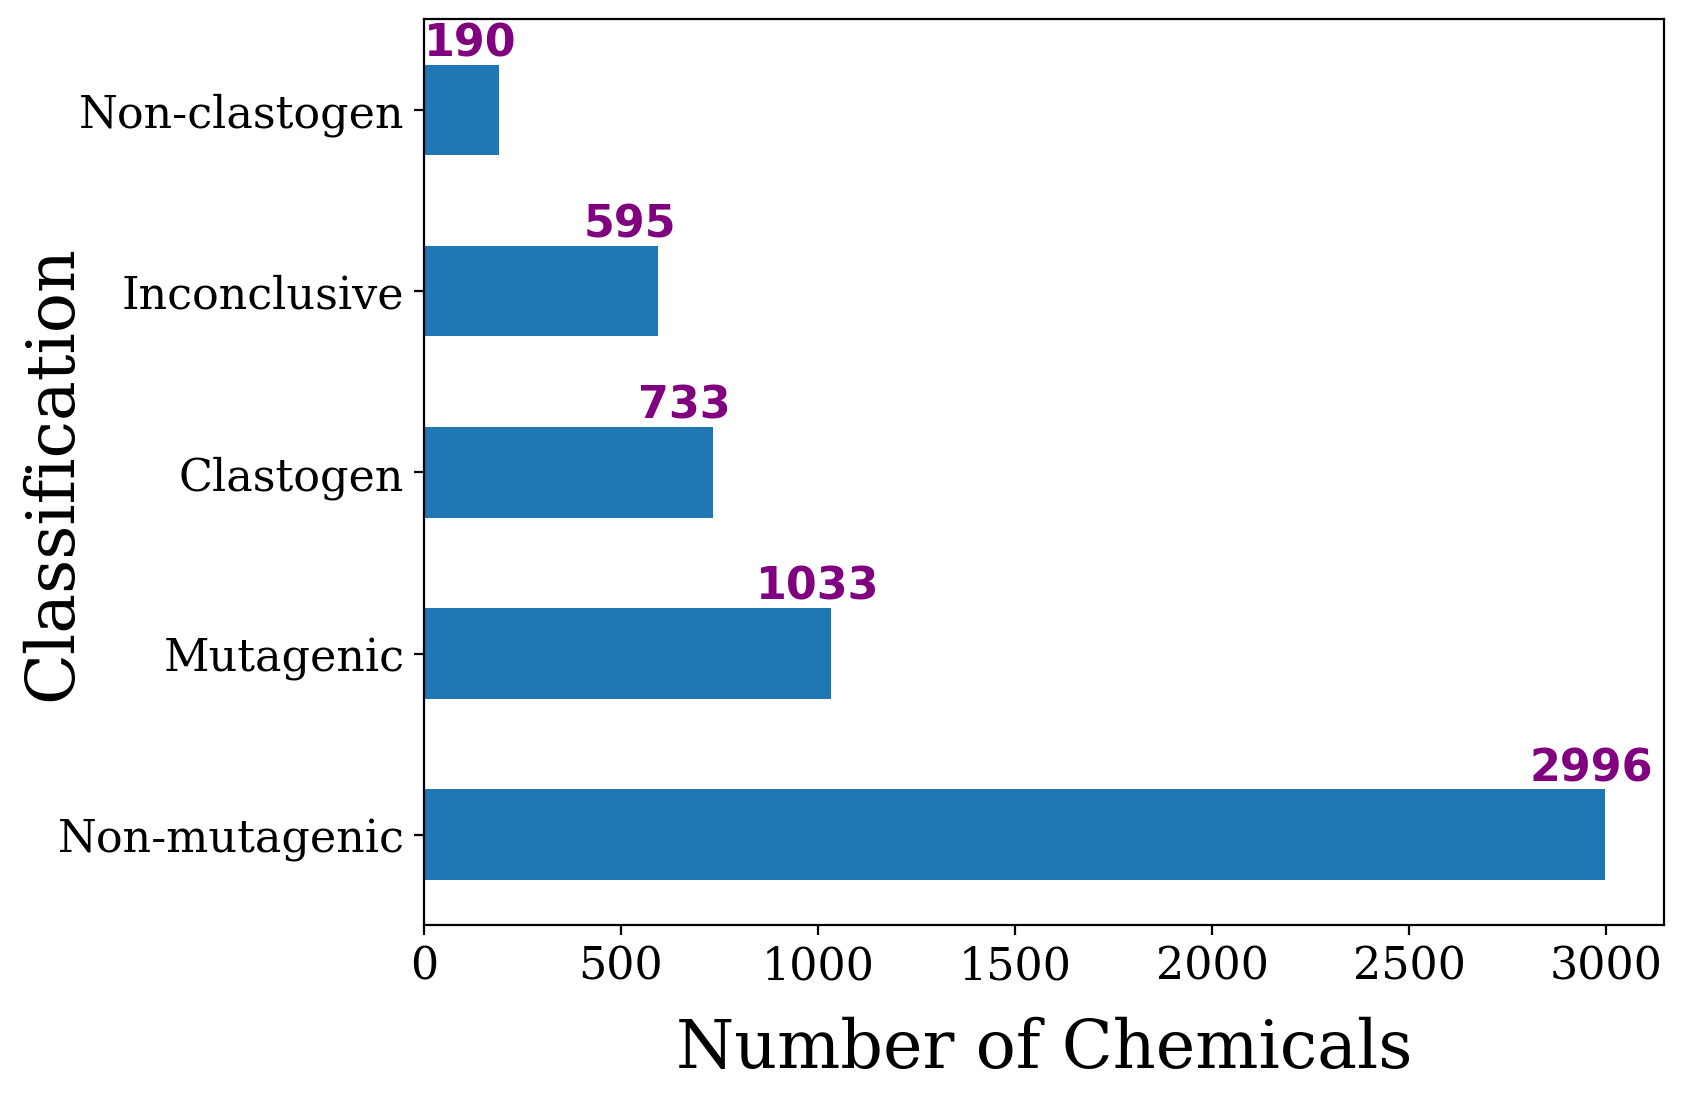

In [20]:
demarini = df_demarini.copy()

plt.figure(figsize=(8, 6), dpi = 200)
y = demarini.DeMarini_call.value_counts()
ax = y.plot.barh()
for i, v in enumerate(y):
    ax.text(v-190, i + .3, str(v), color='purple', fontsize = 16, fontweight = 'bold')
plt.xticks(fontsize = 16, family = 'serif')
ticklabels = ['Non-mutagenic', 'Mutagenic', 'Clastogen', 'Inconclusive', 'Non-clastogen']
plt.yticks(range(0,5), ticklabels, fontsize = 16, family = 'serif')
plt.xlabel('Number of Chemicals', size = 24, labelpad = 10, family = 'serif')
plt.ylabel('Classification', size = 24, labelpad = -10, family = 'serif')
#plt.savefig(figures_dir+'ClassificationCount.png', bbox_inches='tight')


#### Generate data for Table 3 and 4 in manuscript 

In [22]:
demarini.DeMarini_call.unique()

array(['clastogen', 'gentox', 'non gentox', nan, 'inconclusive',
       'not clastogen'], dtype=object)

In [61]:
tag = {'clastogen':1, 'gentox':1, 'non gentox':0,  'inconclusive':np.nan,
       'not clastogen':0}

In [62]:
demarini['DeMarini_outcome'] = demarini['DeMarini_call'].replace(tag)

In [63]:
demarini

,DeMarini_call,DTXSID,DeMarini_outcome
CASRN,,,
75-07-0,clastogen,DTXSID5039224,1.0
50-81-7,clastogen,DTXSID5020106,1.0
100-52-7,clastogen,DTXSID8039241,1.0
119-53-9,clastogen,DTXSID1020144,1.0
140-11-4,clastogen,DTXSID0020151,1.0
...,...,...,...
39013-93-9,NaN,-,NaN
54779-53-2,NaN,-,NaN
58337-34-1,NaN,-,NaN


In [27]:
demarini = demarini.set_index('CASRN')

In [49]:
genetox_data = genetox.copy()

#### Create a new dataframe for summary assay statistics per chemical

In [50]:
## Create a new dataframe for summary assay statistics per chemical
genetox_data_summary = pd.DataFrame(index = demarini.index, columns = ['nAmes', 'nAmesPos', 'nAmesNeg', 'nAmesInc', '%AmesPos', \
                                                                'nClas', 'nClasPos','nClasNeg', 'nClasInc', '%ClasPos', 'DeMarini'])
genetox_data_summary['DeMarini'] = demarini['DeMarini_outcome']
# Update each row in the dataframe
for casrn in genetox_data_summary.index:
    # Ames
    genetox_data_summary.loc[casrn, 'nAmes'] = len(genetox_data[(genetox_data['casrn'] == casrn) \
                            & (genetox_data['simple_aggregate'] == 'Ames')])
    genetox_data_summary.loc[casrn, 'nAmesPos'] = len(genetox_data[(genetox_data['casrn'] == casrn) \
                            & (genetox_data['simple_aggregate'] == 'Ames')\
                            & (genetox_data['assay_outcome'] == 1)])
    genetox_data_summary.loc[casrn, 'nAmesNeg'] = len(genetox_data[(genetox_data['casrn'] == casrn) \
                            & (genetox_data['simple_aggregate'] == 'Ames')\
                            & (genetox_data['assay_outcome'] == 0)])
    genetox_data_summary.loc[casrn, 'nAmesInc'] = len(genetox_data[(genetox_data['casrn'] == casrn) \
                            & (genetox_data['simple_aggregate'] == 'Ames')\
                            & (genetox_data['assay_outcome'] == 2)])
    if genetox_data_summary.loc[casrn, 'nAmes'] == 0:
        genetox_data_summary.loc[casrn, '%AmesPos'] = np.nan
    else:
        genetox_data_summary.loc[casrn, '%AmesPos'] = 100*genetox_data_summary.loc[casrn, 'nAmesPos']/genetox_data_summary.loc[casrn, 'nAmes']
    # Update inconclusives
    n1 = len(genetox_data[(genetox_data['casrn'] == casrn) \
                            & (genetox_data['simple_aggregate'] == 'Ames')\
                            & (genetox_data['assay_outcome'] == 2)])
    if genetox_data_summary.loc[casrn, '%AmesPos'] == 0 and n1 > 0:
        genetox_data_summary.loc[casrn, '%AmesPos'] = -9 #inconclusive is indicated by -9
   # Clastogens
    genetox_data_summary.loc[casrn, 'nClas'] = len(genetox_data[(genetox_data['casrn'] == casrn) \
                            & (genetox_data['simple_aggregate'] == 'clastogen')])
    genetox_data_summary.loc[casrn, 'nClasPos'] = len(genetox_data[(genetox_data['casrn'] == casrn) \
                            & (genetox_data['simple_aggregate'] == 'clastogen')\
                            & (genetox_data['assay_outcome'] == 1)])
    genetox_data_summary.loc[casrn, 'nClasNeg'] = len(genetox_data[(genetox_data['casrn'] == casrn) \
                            & (genetox_data['simple_aggregate'] == 'clastogen')\
                            & (genetox_data['assay_outcome'] == 0)])    
    genetox_data_summary.loc[casrn, 'nClasInc'] = len(genetox_data[(genetox_data['casrn'] == casrn) \
                            & (genetox_data['simple_aggregate'] == 'clastogen')\
                            & (genetox_data['assay_outcome'] == 2)])        
    if genetox_data_summary.loc[casrn, 'nClas'] == 0:
        genetox_data_summary.loc[casrn, '%ClasPos'] = np.nan
    else:
        genetox_data_summary.loc[casrn, '%ClasPos'] = 100*genetox_data_summary.loc[casrn, 'nClasPos']/genetox_data_summary.loc[casrn, 'nClas']
    # Update inconclusives 
    n2 = len(genetox_data[(genetox_data['casrn'] == casrn) \
                            & (genetox_data['simple_aggregate'] == 'clastogen')\
                            & (genetox_data['assay_outcome'] == 2)])    
    if genetox_data_summary.loc[casrn, '%ClasPos'] == 0 and n2 > 0:
        genetox_data_summary.loc[casrn, '%ClasPos'] = -9 #inconclusive is indicated by -9

#%%

In [52]:
genetox_data_summary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7437 entries, 75-07-0 to 86674-51-3
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   nAmes     7437 non-null   object
 1   nAmesPos  7437 non-null   object
 2   nAmesNeg  7437 non-null   object
 3   nAmesInc  7437 non-null   object
 4   %AmesPos  4907 non-null   object
 5   nClas     7437 non-null   object
 6   nClasPos  7437 non-null   object
 7   nClasNeg  7437 non-null   object
 8   nClasInc  7437 non-null   object
 9   %ClasPos  2684 non-null   object
 10  DeMarini  5547 non-null   object
dtypes: object(11)
memory usage: 1017.2+ KB


In [67]:
genetox_data_summary.head()

,nAmes,nAmesPos,nAmesNeg,nAmesInc,%AmesPos,nClas,nClasPos,nClasNeg,nClasInc,%ClasPos,DeMarini,DeMarini_outcome
CASRN,,,,,,,,,,,,
75-07-0,4,0,4,0,0,9,9,0,0,100,1.0,clastogen
50-81-7,1,0,0,1,-9,22,21,0,1,95.4545,1.0,clastogen
100-52-7,5,0,5,0,0,4,2,2,0,50,1.0,clastogen
119-53-9,0,0,0,0,NaN,8,8,0,0,100,1.0,clastogen
140-11-4,0,0,0,0,NaN,8,6,2,0,75,1.0,clastogen


### Counts for Table 3. in manuscript (Analysis of chemicals tested in the Ames assay and their classification as genotoxic, non-genotoxic or inconclusive using the genotoxicity categorisation scheme)

In [66]:

#Ames
n10 = len(genetox_data_summary[(genetox_data_summary['%AmesPos'] != -9) & (genetox_data_summary['%AmesPos'] < 50)])
n20 = len(genetox_data_summary[(genetox_data_summary['%AmesPos'] != -9) & (genetox_data_summary['%AmesPos'] >= 50)]) 
n30 = len(genetox_data_summary[(genetox_data_summary['%AmesPos'] == -9)]) 
print("Count PercAmesPos <50 = %d" %n10)
print("Count PercAmesPos >=50 = %d" %n20)
print("Count Ames Inconclusives = %d" %n30)

#Ames and DeMarini negative
n11 = len(genetox_data_summary[(genetox_data_summary['%AmesPos'] != -9) & (genetox_data_summary['%AmesPos'] < 50) & (genetox_data_summary['DeMarini'] ==0)])
n21 = len(genetox_data_summary[(genetox_data_summary['%AmesPos'] != -9) & (genetox_data_summary['%AmesPos'] >= 50) & (genetox_data_summary['DeMarini'] ==0)])
n31 = len(genetox_data_summary[(genetox_data_summary['%AmesPos'] == -9) & (genetox_data_summary['DeMarini'] ==0)])
print("Count DeMarini negative and PercAmesPos <50 = %d" %n11)
print("Count DeMarini negative and PercAmesPos >=50 = %d" %n21)
print("Count DeMarini negative and Ames Inconclusives = %d" %n31)

#Ames and DeMarini positive
n12 = len(genetox_data_summary[(genetox_data_summary['%AmesPos'] != -9) & (genetox_data_summary['%AmesPos'] < 50) & (genetox_data_summary['DeMarini'] ==1)])
n22 = len(genetox_data_summary[(genetox_data_summary['%AmesPos'] != -9) & (genetox_data_summary['%AmesPos'] >= 50) & (genetox_data_summary['DeMarini'] ==1)])
n32 = len(genetox_data_summary[(genetox_data_summary['%AmesPos'] == -9) & (genetox_data_summary['DeMarini'] ==1)])
print("Count DeMarini positive and PercAmesPos <50 = %d" %n12)
print("Count DeMarini positive and PercAmesPos >=50 = %d" %n22)
print("Count DeMarini positive and Ames Inconclusives = %d" %n32)

#Ames and DeMarini Inconclusive
n13 = len(genetox_data_summary[(genetox_data_summary['%AmesPos'] != -9) & (genetox_data_summary['%AmesPos'] < 50) & (genetox_data_summary['DeMarini'].isnull())])
n23 = len(genetox_data_summary[(genetox_data_summary['%AmesPos'] != -9) & (genetox_data_summary['%AmesPos'] >= 50) & (genetox_data_summary['DeMarini'].isnull())])
n33 = len(genetox_data_summary[(genetox_data_summary['%AmesPos'] == -9) & (genetox_data_summary['DeMarini'].isnull())])
print("Count DeMarini Inconclusive and PercAmesPos <50 = %d" %n13)
print("Count DeMarini Inconclusive and PercAmesPos >=50 = %d" %n23)
print("Count DeMarini Inconclusive and Ames Inconclusives = %d" %n33)



Count PercAmesPos <50 = 3653
Count PercAmesPos >=50 = 870
Count Ames Inconclusives = 384
Count DeMarini negative and PercAmesPos <50 = 2996
Count DeMarini negative and PercAmesPos >=50 = 0
Count DeMarini negative and Ames Inconclusives = 0
Count DeMarini positive and PercAmesPos <50 = 537
Count DeMarini positive and PercAmesPos >=50 = 870
Count DeMarini positive and Ames Inconclusives = 33
Count DeMarini Inconclusive and PercAmesPos <50 = 120
Count DeMarini Inconclusive and PercAmesPos >=50 = 0
Count DeMarini Inconclusive and Ames Inconclusives = 351


#### Counts for Table 4 in manuscript (A Characterisation of number of chemicals tested in less than K (1, 2, 3, 4, 5 and 10) or less number of Ames or Clastogen assays)

In [54]:

for k in range(11):
    a = genetox_data_summary[genetox_data_summary['nAmes'] <= k]['nAmes'].count()
    c = genetox_data_summary[genetox_data_summary['nClas'] <= k]['nClas'].count()
    print("Number of chemicals tested in <= %d Ames assays = %d" %(k,a))
    print("Number of chemicals tested in <= %d Clastogen assays = %d" %(k,c))


Number of chemicals tested in <= 0 Ames assays = 2530
Number of chemicals tested in <= 0 Clastogen assays = 4753
Number of chemicals tested in <= 1 Ames assays = 4319
Number of chemicals tested in <= 1 Clastogen assays = 6038
Number of chemicals tested in <= 2 Ames assays = 5240
Number of chemicals tested in <= 2 Clastogen assays = 6706
Number of chemicals tested in <= 3 Ames assays = 5592
Number of chemicals tested in <= 3 Clastogen assays = 7002
Number of chemicals tested in <= 4 Ames assays = 6155
Number of chemicals tested in <= 4 Clastogen assays = 7163
Number of chemicals tested in <= 5 Ames assays = 6328
Number of chemicals tested in <= 5 Clastogen assays = 7219
Number of chemicals tested in <= 6 Ames assays = 6587
Number of chemicals tested in <= 6 Clastogen assays = 7264
Number of chemicals tested in <= 7 Ames assays = 6656
Number of chemicals tested in <= 7 Clastogen assays = 7302
Number of chemicals tested in <= 8 Ames assays = 6883
Number of chemicals tested in <= 8 Clastog